# Mortal Fibonacci Rabbits
https://rosalind.info/problems/fibd/

### Practice

In [30]:
m = 3
months = list(range(1,n +1))
sliced = months[2:len(months):m]
print(months)
print(sliced)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[3, 6, 9, 12]


In [14]:
n = 12 # population after n months
m = 3 # rabbits die after m months
months = list(range(1,n +1))
sliced = months[0:len(months):m]
print(months)
print(sliced)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 4, 7, 10]


In [14]:
n = 6  # population after n months
m = 3
months = list(range(3,n + 1))

population = [0]*(n+1)
population[1] = 1
population[2] = 1

for i in months:
    if i <= m:
        population[i] = population[i-1] + population[i-2]
    elif i == m + 1:
        population[i] = population[i-1] + population[i-2] - 1
    else:
        population[i] = population[i-1] + population[i-2] - population[i-m-1]
print(population[n])


4


In [15]:
n = 6
m = 3

births = [0] * (n+1)
mature = [0] * (n+1)
deaths = [0] * (n+1)
total = [0] * (n+1)

# Month 1: start with 1 newborn
births[1] = 1
total[1] = 1

for i in range(2, n+1):

    # births come from last month's mature rabbits
    births[i] = mature[i-1]

    # rabbits mature after 1 month
    mature[i] = births[i-1] + mature[i-1]

    # rabbits die after m months
    if i > m:
        deaths[i] = births[i-m]
    else:
        deaths[i] = 0

    total[i] = total[i-1] + births[i] - deaths[i]

print(total[n])
    

6


In [16]:
n = 96
m = 16

births = [0] * (n+1)
mature = [0] * (n+1)
deaths = [0] * (n+1)
total = [0] * (n+1)

In [18]:
for i in range(1, n+1):
    if i == 1:
        births[i] = 1
        mature[i] = 0
        deaths[i] = 0
        total[i] = 1
        continue
    if i > m:
        deaths[i] = births[i-m]
    else:
        deaths[i] = 0
    births[i] = mature[i-1]
    mature[i] = births[i-1] + mature[i-1]
    total[i] = total[i-1] + births[i] - deaths[i]

print(total[n])



51657292126509855387


### Starting over 
Since most of my attempts up until now were not working. I have drawn out again the tree and tried to find formulas which accomodate the new population trends.
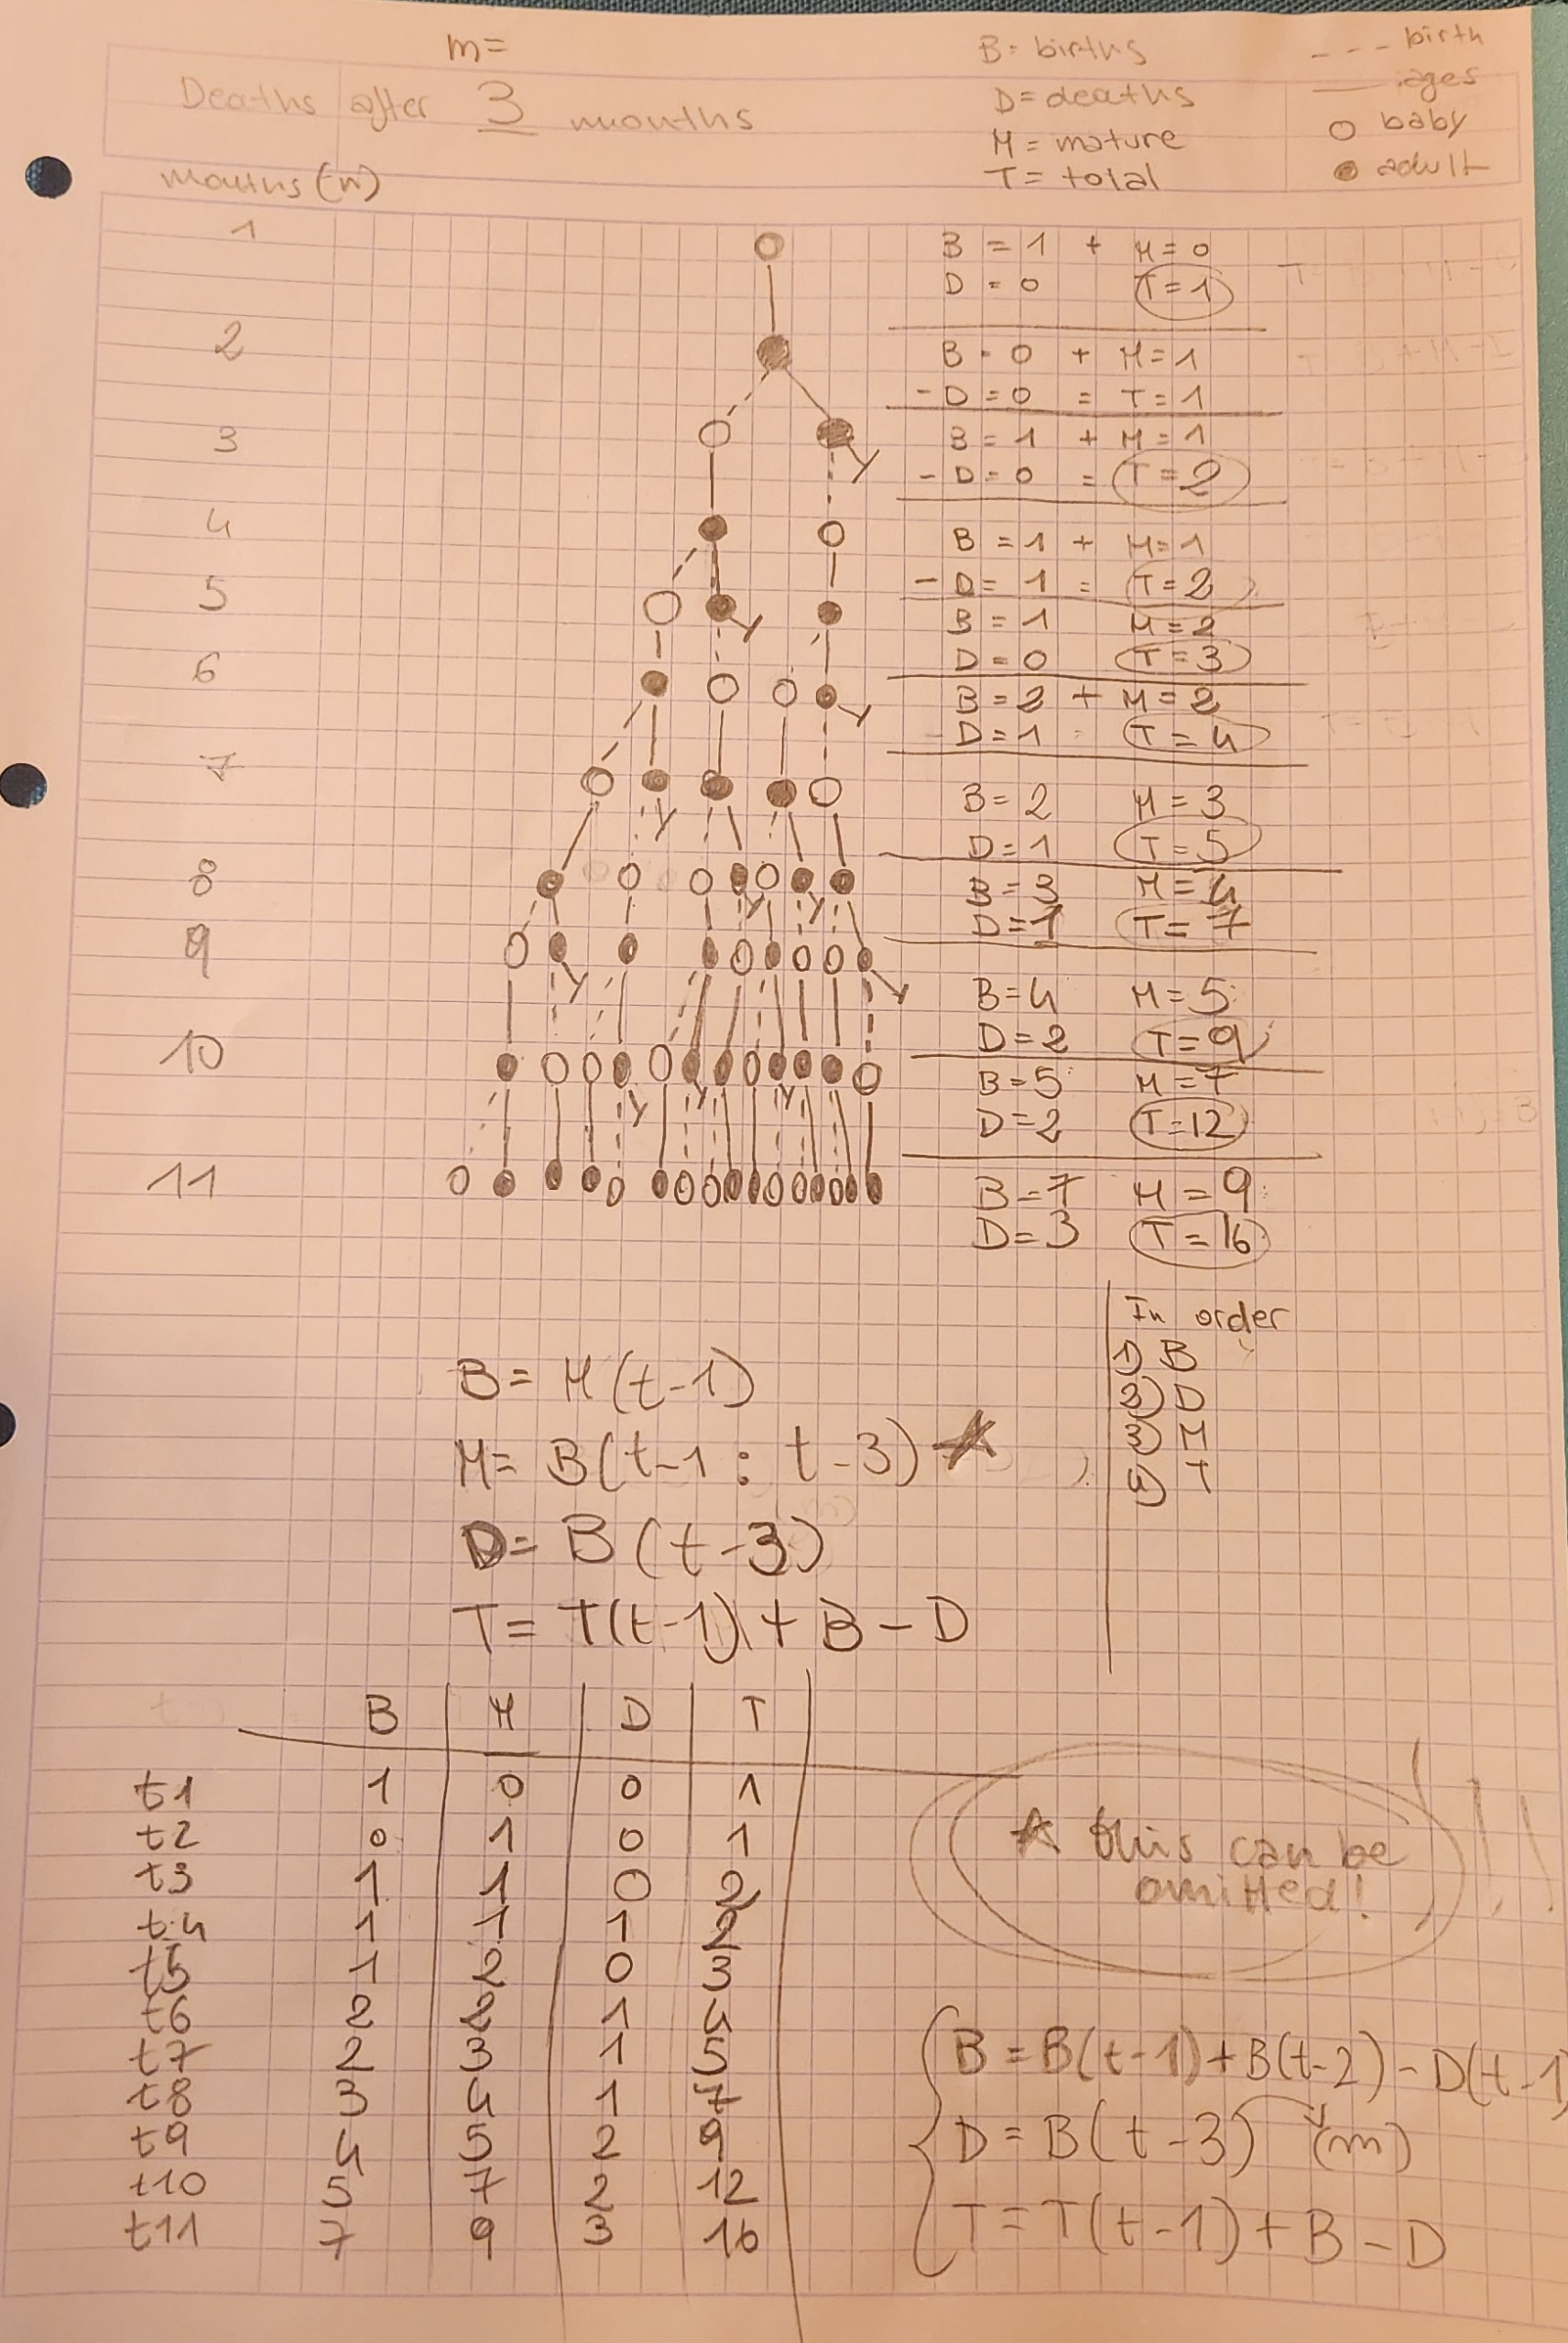

Newest formulas, highlighted as &#9734;, are written as a result of modification due to incorrect numbers derived by calculation of mature rabbits.

- from someone's comment, use to check your results <br/>
 m=3   [1, 1, 2, 2, 3, 4, 5, 7, 9, 12] <br/>
 m=4   [1, 1, 2, 3, 4, 6, 9, 13, 19, 28] <br/>
 m=5   [1, 1, 2, 3, 5, 7, 11, 17, 26, 40] <br/>
 m=6   [1, 1, 2, 3, 5, 8, 12, 19, 30, 47] <br/>
 m=7   [1, 1, 2, 3, 5, 8, 13, 20, 32, 51] <br/>

- some other comparisons
25, 31 => 75025 <br/>
30, 30 => 832040 <br/>
99, 16 => 215182717852492203481 <br/>
100, 4 => 24382819596721629 <br/>
70, 10 => 150851612688734 <br/>
150, 30 => 9968924833182193029336126851509 <br/>

In [64]:
n = 10
m = 3

births = [0] * (n+1)
mature = [0] * (n+1)
deaths = [0] * (n+1)
total = [0] * (n+1)
births[1] = 1
mature[2] = 1
total[1] = 1 
total[2] = 1

In [65]:
print("births =", births)
print("mature =", mature)
print("deaths =", deaths)
print("total =", total )

births = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
mature = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
deaths = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
total = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [66]:
# this is just to try out the mathematical formula for calculating mature individuals
trial_births = [0,1,0,1,1,1,2,2,3,4,5,7]

In [67]:
sum(trial_births[9-m+1:9]) # this should be 5 when m = 3

5

In [68]:
births[1] = 1
mature[2] = 1
for i in range(3, n+1):
        births[i] = mature[i-1]
        deaths[i] = births[i - m]
        mature[i] = sum(births[i-m+1:i])
        total[i] = total[i-1] + births[i] - deaths[i]

In [69]:
print("births", births)
print("deaths", deaths)
print("mature", mature)
print("total",  total)

births [0, 1, 0, 1, 1, 1, 2, 2, 3, 4, 5]
deaths [0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2]
mature [0, 0, 1, 1, 1, 2, 2, 3, 4, 5, 7]
total [0, 1, 1, 2, 2, 3, 4, 5, 7, 9, 12]


The current function only seem to work for m = 3 and m = 4 but not above that. Futhermore, it does not work for instances where the lifespan is larger than the total number of months.

In [70]:
n = 99
m = 16

births = [0] * (n+1)
mature = [0] * (n+1)
deaths = [0] * (n+1)
total = [0] * (n+1)

births[1] = 1
mature[2] = 1
total[1] = 1 
total[2] = 1

for i in range(3, n+1):
    births[i] = mature[i-1]
    deaths[i] = births[i - m]
    if i - m >= 0:
        mature[i] = sum(births[i-(m-1) : i-1])
    else:
        mature[i] = sum(births[0 : i-1])
    total[i] = total[i-1] + births[i] - deaths[i]

In [71]:
print(total[n])

15368955335002523


I understand my problem lies with the way I am calculating the mature rabbits. So, this time I try to calculate the births in a different way. From my graph I have noticed that `births = mature(t-1)` but also `births = births(t-1) + births(t-2) - deaths(t-1)`. 

See &#9734; highlight in the original picture.

In [72]:
n = 99
m = 16

births = [0] * (n+1)
deaths = [0] * (n+1)
total = [0] * (n+1)

births[1] = 1
total[1] = 1 
total[2] = 1

for i in range(3, n+1):
    births[i] = births[i - 1] + births[i - 2] - deaths[i - 1]
    deaths[i] = births[i - m]
    total[i] = total[i-1] + births[i] - deaths[i]
print(total[n])

215182717852492203481


So, now this seems to work but I will get an error if I try to have m > n. So I need to fix that as well. The problem seems to be when I try to assign `deaths[i] = births[i - m]`, as this to a 'list index out of range' error.

In [63]:
n = 25
m = 31

births = [0] * (n+1)
deaths = [0] * (n+1)
total = [0] * (n+1)

births[1] = 1
total[1] = 1 
total[2] = 1

for i in range(3, n+1):
    births[i] = births[i - 1] + births[i - 2] - deaths[i - 1]
    if i > m: # deaths are calculated only when minumum age is reached
        deaths[i] = births[i - m]
    else: #otherwise deaths are 0!
        deaths[i] = 0
    total[i] = total[i-1] + births[i] - deaths[i]
        
print(total[n])

75025


After trialling with the various comments found on the Rosalind forum, I can (hopefully) say I have solved the problem. Next, I will wrap the winning solution into a function.

In [73]:
def mortal_rabbits(n, m):
    births = [0] * (n+1)
    deaths = [0] * (n+1)
    total = [0] * (n+1)
    
    births[1] = 1
    total[1] = 1 
    total[2] = 1
    
    for i in range(3, n+1):
        births[i] = births[i - 1] + births[i - 2] - deaths[i - 1]
        if i > m: 
            deaths[i] = births[i - m]
        else: 
            deaths[i] = 0
        total[i] = total[i-1] + births[i] - deaths[i]
    print(total[n])

In [76]:
mortal_rabbits(150, 30)

9968924833182193029336126851509


### Rosalind's problem

In [77]:
mortal_rabbits(96, 20)

51561931155211866078
